In [1]:
import sympy as sp
import numpy as np
x = sp.symbols('x')

In [2]:
As = 2 * np.pi/4 * 20**2
As

628.3185307179587

In [3]:
def area(d):
    return((sp.pi/4)*d**2)

In [4]:
b = 300
h = 450
c = 40
d = h - c
Asc = 2*area(14).evalf()
As = 4*area(20).evalf()
n = 15
print(As,Asc)

1256.63706143592 307.876080051800


In [5]:
NA_eq = sp.Eq(
 ((b*x**2)/2)+(n*Asc*(x-c))-((b*(h-x)**2)/2)-(n*As*(d-x)), 0
)
NA = sp.solve(NA_eq, x)
x_ucr = NA[0]
x_ucr.evalf()

241.614185547915

JidI = 
  I for the portion of concrete above neutral axis + I for transformed compression reinforcement + I for the portion of concrete below the neutral axis + I for the transformed tensile reinforcement

In [6]:
JidI =  (b/3)*x_ucr**3 + n*Asc*(x_ucr-c)**2 + (b/3)*(h-x_ucr)**3 + n*As*(d-x_ucr)**2 
JidI.evalf()

3037564911.52695

For cracked section:

In [7]:
NA_eq = sp.Eq(b*x**2/2 + n*Asc*(x-c) - n*As*(d-x),0)
NA = sp.solve(NA_eq, x)
print(NA)
x_cr = next(num for num in NA if num > 0).evalf()
x_cr.evalf()

[-320.862993986493, 164.411679837721]


164.411679837721

In [8]:
JidII = (b/3)*x_cr**3 + n*Asc*(x_cr-c)**2 + n*As*(d-x_cr)**2
JidII.evalf()

1652790335.55437

Ec - Young's Modulous of concrete, according to Eurocode 2, the formula is 
Ec = 22((fck+8)/10)^0.3

In [9]:
fck = 20
Ec = 22*((fck+8)/10)**0.3
Ec

29.96195105464031

Mrd

In [10]:
fyd = 450/1.15
fck = 30
fcd = 0.85*fck/1.5
x_ult = (fyd*(As-Asc))/(0.8*b*fcd)
print(x_ult.evalf())

Mrd = As * fyd * (d - 0.4 * x_ult) / (10**6)
Mrd.evalf()

90.9937002606251


183.710650205289

In [11]:
Es = 210000
ρs1 = (As)/(b*d)
ρs2 = (As-Asc)/(b*d)
εsy = fyd/Es
Xel = (n*ρs2*d)*(-1+sp.sqrt(1+(2/(n*ρs2))))
Xel.evalf()
φel = εsy/(d-Xel)
φel.evalf()
print(ρs1*100,ρs2*100,Xel.evalf())



1.02165614750888 0.771350391369201 155.415515691784


In [12]:
εcu = 0.0035
x_ult = (fyd*(As-Asc))/(0.8*b*fcd)
φu = εcu/x_ult
φu.evalf()

3.84642012576174e-5

In [13]:
Ds = φu/φel
Ds.evalf()

5.25524867827057

In [17]:
import matplotlib.pyplot as plt

# Define symbols
# ρs2 = sp.Symbol('ρs2')
# Es = 210000
# fyd = 391.3  # Example value, replace with actual value
# fcd =   # Example value, replace with actual value
# b = 300  # Example value, replace with actual value
# d = 500  # Example value, replace with actual value
# As = 1500  # Example value, replace with actual value
# Asc = 200  # Example value, replace with actual value
# n = Es / (0.85 * fcd)
ρs2 = 0.005
# Calculate εsy, Xel, φel
εsy = fyd / Es
Xel = (n * ρs2*d) * (-1 + sp.sqrt(1 + (2 / (n * ρs2))))
φel = εsy / (d - Xel)

# Calculate εcu, x_ult, φu
εcu = 0.0035
x_ult = (fyd * (As - Asc)) / (0.8 * b * fcd)
φu = εcu / x_ult

Ds = φu / φel
Ds.evalf()

# # Define the range for ρs2
# ps_values = np.linspace(0.002, 0.015, 100)

# # Calculate ductility for each ρs2 value
# ductility_values = [φu / φel.evalf(subs={ρs2: ps}) for ps in ps_values]

# # Calculate ductility values at specific ρs2 values
# ps_05 = 0.005
# ps_10 = 0.01
# ductility_05 = φu / φel.evalf(subs={ρs2: ps_05})
# ductility_10 = φu / φel.evalf(subs={ρs2: ps_10})

# # Plot the graph
# plt.plot(ps_values, ductility_values, label='Ductility vs ρs2')
# plt.scatter([ps_05, ps_10], [ductility_05, ductility_10], color='red')  # Markers for specific points
# plt.text(ps_05, ductility_05, f'({ps_05}, {ductility_05:.2f})', fontsize=9, ha='right')
# plt.text(ps_10, ductility_10, f'({ps_10}, {ductility_10:.2f})', fontsize=9, ha='right')
# plt.xlabel('ρs2')
# plt.ylabel('Ductility')
# plt.title('Ductility vs ρs2')
# plt.grid(True)
# plt.legend()
# plt.show()

5.75940438249331

17.0 391.304347826087 15 0.0035 0.001863354037267081


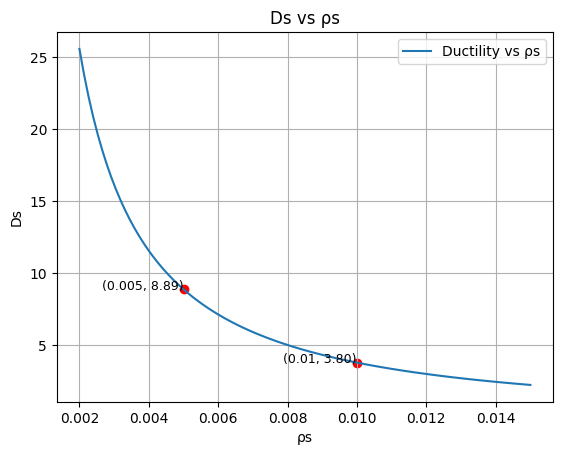

In [76]:
# Define the range for ρs
ps_values = np.linspace(0.002, 0.015, 100)
print(fcd,fyd,n,εcu,εsy)
Ds_values = []
for ps in ps_values:
    Ds_values.append((εcu/εsy)*((0.8*fcd)/(ps*fyd))*((1-n*ps*(-1+sp.sqrt(1+(2/(n*ps)))))))

# for Ds in Ds_values:
#     print(Ds.evalf())

ps_05 = 0.005
ps_10 = 0.01
ductility_05 = (εcu/εsy)*((0.8*fcd)/(ps_05*fyd))*((1-n*ps_05*(-1+sp.sqrt(1+(2/(n*ps_05))))))
ductility_10 = (εcu/εsy)*((0.8*fcd)/(ps_10*fyd))*((1-n*ps_10*(-1+sp.sqrt(1+(2/(n*ps_10))))))
#plot
plt.plot(ps_values, Ds_values, label='Ductility vs ρs')
plt.scatter([ps_05, ps_10], [ductility_05, ductility_10], color='red')  # Markers for specific points
plt.text(ps_05, ductility_05, f'({ps_05}, {ductility_05:.2f})', fontsize=9, ha='right')
plt.text(ps_10, ductility_10, f'({ps_10}, {ductility_10:.2f})', fontsize=9, ha='right')
plt.xlabel('ρs')
plt.ylabel('Ds')
plt.title('Ds vs ρs')
plt.grid(True)
plt.legend()
plt.show()

